In [1]:
import faostat
import seaborn as sns
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import warnings
#fp1 = '/Users/myliheik/Documents/myR/foodbalancesheets/FoodBalanceSheetsHistoric_E_All_Data/FoodBalanceSheetsHistoric_E_All_Data.csv'
#fp2 = '/Users/myliheik/Documents/myR/foodbalancesheets/FoodBalanceSheetsHistoric_E_All_Data/FoodBalanceSheetsHistoric_E_All_Data.csv'

#fp3 = '/Users/myliheik/Documents/myR/foodbalancesheets/FoodBalanceSheetsHistoric_E_All_Data_Normalized/FoodBalanceSheetsHistoric_E_All_Data.csv'
fp4 = '/Users/myliheik/Documents/myR/foodbalancesheets/FoodBalanceSheets_E_All_Data_Normalized/FoodBalanceSheets_E_All_Data_Normalized.csv'


#df1 = pd.read_csv(fp4)
#df1.head()

In [2]:
df1['Element'].value_counts()

Element
Domestic supply quantity                  329755
Import quantity                           318901
Fat supply quantity (g/capita/day)        310269
Fat supply quantity (t)                   310269
Food supply (kcal/capita/day)             310263
Food supply (kcal)                        310263
Protein supply quantity (g/capita/day)    310263
Protein supply quantity (t)               310263
Food supply quantity (kg/capita/yr)       308034
Food                                      308034
Residuals                                 303491
Stock Variation                           271538
Export quantity                           268537
Production                                225994
Losses                                    146268
Feed                                      114828
Other uses (non-food)                     110944
Tourist consumption                        93570
Processing                                 92939
Seed                                       63173
Total Popula

In [90]:
ld = faostat.list_datasets_df()
ld # 'FBS': 'Food Balances (2010-)'
# 'FBSH': 'Food Balances (-2013, old methodology and population)'

,code,label,date_update,note_update,release_current,state_current,year_current,release_next,state_next,year_next
0,QCL,Crops and livestock products,2025-06-11,minor revision,2024-12-20 / 2025-06-11,final,2023,2025-12,final,2024
1,QI,Production Indices,2025-02-03,,2025-02-03,final,2023,2025-12,final,2024
2,QV,Value of Agricultural Production,2025-02-03,,2025-02-03,final,2023,2025-12,final,2024
3,FS,Suite of Food Security Indicators,2025-07-28,,2025-07-28,final,2024,2026-07,final,2025
4,FBS,Food Balances (2010-),2025-10-28,,2025-10-28,final,2023,2026-10,final,2024
...,...,...,...,...,...,...,...,...,...,...
63,FA,Food Aid Shipments (WFP),2016-12-22,,2016-12-22,preliminary,2016,,,
64,RM,Machinery,2021-12-03,minor revision,2011-12-22 / 2021-12-03,final,2009,,,
65,RY,Machinery Archive,2021-12-03,minor revision,2006-12-31 / 2021-12-03,final,2005,,,
66,RA,Fertilizers archive,2020-09-08,minor revision,2013-12-31 / 2020-09-08,final,2002,,,


In [91]:
faostat.list_pars('FBS')
#faostat.list_pars_df('FBS')

[('parameter code', 'coding_systems', 'subdimensions {code: meaning}'),
 ('area',
  ['M49', 'FAO', 'ISO2', 'ISO3'],
  {'countries': 'Countries',
   'regions': 'Regions',
   'specialgroups': 'Special Groups'}),
 ('element', [], {'elements': 'Elements'}),
 ('item', ['FBS', 'FAO'], {'items': 'Items', 'itemsagg': 'Items Aggregated'}),
 ('year', [], {'years': 'Years'})]

In [92]:
faostat.list_pars('FBSH')


[('parameter code', 'coding_systems', 'subdimensions {code: meaning}'),
 ('area',
  ['M49', 'FAO', 'ISO2', 'ISO3'],
  {'countries': 'Countries',
   'regions': 'Regions',
   'specialgroups': 'Special Groups'}),
 ('element', [], {'elements': 'Elements'}),
 ('item', ['FBS', 'FAO'], {'items': 'Items', 'itemsagg': 'Items Aggregated'}),
 ('year', [], {'years': 'Years'})]

In [93]:
faostat.get_par('FBS', 'element')

{'Total Population - Both sexes': '511',
 'Production Quantity': '2510',
 'Import quantity': '2610',
 'Stock Variation': '2071',
 'Export quantity': '2910',
 'Domestic supply quantity': '2300',
 'Feed': '2520',
 'Seed': '2525',
 'Losses': '2120',
 'Processed': '2130',
 'Other uses (non-food)': '2151',
 'Tourist consumption': '5171',
 'Residuals': '5170',
 'Food': '2141',
 'Food supply quantity (kg/capita/yr)': '645',
 'Food supply (kcal/capita/day)': '664',
 'Food supply (kcal)': '661',
 'Protein supply quantity (g/capita/day)': '674',
 'Protein supply quantity (t)': '671',
 'Fat supply quantity (g/capita/day)': '684',
 'Fat supply quantity (t)': '681'}

In [95]:
areaDict = faostat.get_par('FBS', 'area')
#countries = list(areaDict.keys())[:179]
#regions = list(areaDict.keys())[179:]

In [125]:
regions = faostat.get_par_df('FBS', 'regions')
countries = faostat.get_par_df('FBS', 'countries')
countries

,label,code,aggregate_type
0,Afghanistan,2,0
1,Albania,3,0
2,Algeria,4,0
3,Angola,7,0
4,Antigua and Barbuda,8,0
...,...,...,...
174,Venezuela (Bolivarian Republic of),236,0
175,Viet Nam,237,0
176,Yemen,249,0
177,Zambia,251,0


In [96]:
elementDict = faostat.get_par('FBSH', 'element')
elementDict.get('Food supply quantity (kg/capita/yr)')

'645'

In [157]:
faostat.get_par('FBSH', 'item')

{'Population': '2501',
 'Wheat and products': '2511',
 'Rice (Milled Equivalent)': '2805',
 'Barley and products': '2513',
 'Maize and products': '2514',
 'Rye and products': '2515',
 'Oats': '2516',
 'Millet and products': '2517',
 'Sorghum and products': '2518',
 'Cereals, Other': '2520',
 'Cassava and products': '2532',
 'Potatoes and products': '2531',
 'Sweet potatoes': '2533',
 'Yams': '2535',
 'Roots, Other': '2534',
 'Sugar cane': '2536',
 'Sugar beet': '2537',
 'Sugar non-centrifugal': '2541',
 'Sugar (Raw Equivalent)': '2542',
 'Sweeteners, Other': '2543',
 'Honey': '2745',
 'Beans': '2546',
 'Peas': '2547',
 'Pulses, Other and products': '2549',
 'Nuts and products': '2551',
 'Soyabeans': '2555',
 'Groundnuts (Shelled Eq)': '2556',
 'Sunflower seed': '2557',
 'Rape and Mustardseed': '2558',
 'Cottonseed': '2559',
 'Coconuts - Incl Copra': '2560',
 'Sesame seed': '2561',
 'Palm kernels': '2562',
 'Olives (including preserved)': '2563',
 'Oilcrops, Other': '2570',
 'Soyabean O

In [12]:
faostat.get_par('FBS', 'itemsagg')

{'Grand Total + (Total)': '2901',
 'Grand Total > (List)': '2901>',
 'Vegetal Products + (Total)': '2903',
 'Vegetal Products > (List)': '2903>',
 'Animal Products + (Total)': '2941',
 'Animal Products > (List)': '2941>',
 'Cereals - Excluding Beer + (Total)': '2905',
 'Cereals - Excluding Beer > (List)': '2905>',
 'Starchy Roots + (Total)': '2907',
 'Starchy Roots > (List)': '2907>',
 'Sugar Crops + (Total)': '2908',
 'Sugar Crops > (List)': '2908>',
 'Sugar & Sweeteners + (Total)': '2909',
 'Sugar & Sweeteners > (List)': '2909>',
 'Pulses + (Total)': '2911',
 'Pulses > (List)': '2911>',
 'Treenuts + (Total)': '2912',
 'Treenuts > (List)': '2912>',
 'Oilcrops + (Total)': '2913',
 'Oilcrops > (List)': '2913>',
 'Vegetable Oils + (Total)': '2914',
 'Vegetable Oils > (List)': '2914>',
 'Vegetables + (Total)': '2918',
 'Vegetables > (List)': '2918>',
 'Fruits - Excluding Wine + (Total)': '2919',
 'Fruits - Excluding Wine > (List)': '2919>',
 'Stimulants + (Total)': '2922',
 'Stimulants > 

In [97]:
myItemsDict = faostat.get_par('FBS', 'item')
myItemsKeys = list(myItemsDict.keys())
myItemsDict.get('Oats')

'2516'

In [5]:
myItemsKeys

['Population',
 'Wheat and products',
 'Rice and products',
 'Barley and products',
 'Maize and products',
 'Rye and products',
 'Oats',
 'Millet and products',
 'Sorghum and products',
 'Cereals, other',
 'Cassava and products',
 'Potatoes and products',
 'Sweet potatoes',
 'Yams',
 'Roots, Other',
 'Sugar cane',
 'Sugar beet',
 'Sugar non-centrifugal',
 'Sugar (Raw Equivalent)',
 'Sweeteners, Other',
 'Honey',
 'Beans',
 'Peas',
 'Pulses, Other and products',
 'Nuts and products',
 'Soyabeans',
 'Groundnuts',
 'Sunflower seed',
 'Rape and Mustardseed',
 'Cottonseed',
 'Coconuts - Incl Copra',
 'Sesame seed',
 'Palm kernels',
 'Olives (including preserved)',
 'Oilcrops, Other',
 'Soyabean Oil',
 'Groundnut Oil',
 'Sunflowerseed Oil',
 'Rape and Mustard Oil',
 'Cottonseed Oil',
 'Palmkernel Oil',
 'Palm Oil',
 'Coconut Oil',
 'Sesameseed Oil',
 'Olive Oil',
 'Ricebran Oil',
 'Maize Germ Oil',
 'Oilcrops Oil, Other',
 'Tomatoes and products',
 'Onions',
 'Vegetables, other',
 'Oranges, 

In [68]:
elementDict

{'Total Population - Both sexes': '511',
 'Production Quantity': '2510',
 'Import Quantity': '2610',
 'Stock Variation': '2071',
 'Export Quantity': '2910',
 'Domestic supply quantity': '2300',
 'Feed': '2520',
 'Seed': '2525',
 'Losses': '2120',
 'Processed': '2130',
 'Other uses (non-food)': '2151',
 'Tourist consumption': '5171',
 'Residuals': '5170',
 'Food': '2141',
 'Food supply quantity (kg/capita/yr)': '645',
 'Food supply (kcal/capita/day)': '664',
 'Protein supply quantity (g/capita/day)': '674',
 'Fat supply quantity (g/capita/day)': '684'}

In [95]:
#faostat.get_par('FBS', 'item')
#faostat.get_par('FBS', 'area')
mycountry = 'Finland'
areaDict.get(mycountry)

'67'

In [107]:
Element = 'Food supply quantity (kg/capita/yr)' # 645
mypars = {'element': [elementDict.get('Food supply quantity (kg/capita/yr)')],'area': areaDict.get('Finland')}

#mypars = {'element': ['645'],'countries': 'Countries'}
#mypars = {'element': ['645']}
mycoding = {'area': 'ISO3'}
mycoding = {'area': 'FAO'}
#mycoding = {'area': 'countries'}

#faostat.get_data_df('FBS', pars={}, coding={}, show_flags=False, null_values=False, show_notes=False, strval=True)
newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)


In [156]:
newdata

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2010,2010,kg/cap,131.83
1,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2011,2011,kg/cap,129.72
2,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2012,2012,kg/cap,135.93
3,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2013,2013,kg/cap,134.31
4,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2014,2014,kg/cap,129.45
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2019,2019,kg/cap,15.27
1382,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2020,2020,kg/cap,14.20
1383,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2021,2021,kg/cap,13.64
1384,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2022,2022,kg/cap,14.74


In [91]:
Element

'Food supply quantity (kg/capita/yr)'

In [55]:
newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
newdata2['Domain'] = 'New FBS'

In [56]:
olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
olddata2['Domain'] = 'Old FBS'

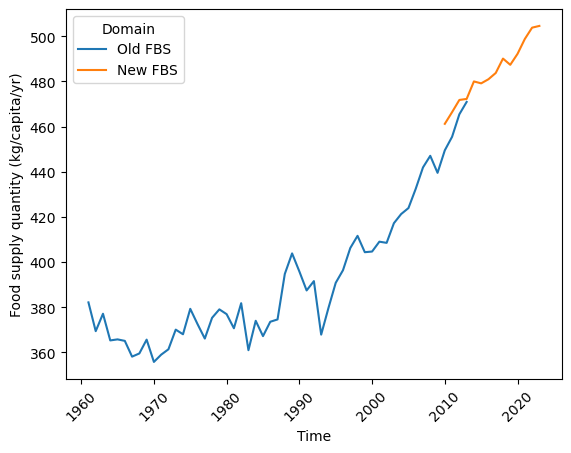

In [110]:
data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
data.rename(columns = {'Value': Element}, inplace = True)
data['Country'] = mycountry
data['Time'] = pd.to_datetime(data.Year, format='%Y')
#data.columns('')
ax = sns.lineplot(data, y = Element, x = 'Time', hue = 'Domain')
#plt.xticks(rotation=30)
ax.tick_params(axis='x', rotation=45)

In [124]:
data2 = data.set_index(['Time', 'Country', 'Domain'])
data3 = data2.drop('Year', axis = 1)
data3

,,,Food supply quantity (kg/capita/yr)
Time,Country,Domain,
1961-01-01,Finland,Old FBS,382.14
1962-01-01,Finland,Old FBS,369.40
1963-01-01,Finland,Old FBS,377.11
1964-01-01,Finland,Old FBS,365.30
1965-01-01,Finland,Old FBS,365.76
...,...,...,...
2019-01-01,Finland,New FBS,487.33
2020-01-01,Finland,New FBS,492.18
2021-01-01,Finland,New FBS,498.77


In [141]:
#put data into xarray!

dataxr = xr.Dataset.from_dataframe(data3)
dataxr

<xarray.Dataset> Size: 2kB
Dimensions:                              (Time: 63, Country: 1, Domain: 2)
Coordinates:
  * Time                                 (Time) datetime64[ns] 504B 1961-01-0...
  * Country                              (Country) object 8B 'Finland'
  * Domain                               (Domain) object 16B 'New FBS' 'Old FBS'
Data variables:
    Food supply quantity (kg/capita/yr)  (Time, Country, Domain) float64 1kB ...

In [143]:
#dataxr = xr.Dataarray.from_dataframe(data3)
#dataxr

In [129]:
tmp = dataxr.sel(Country = "Finland")
tmp

<xarray.Dataset> Size: 2kB
Dimensions:                              (Time: 63, Domain: 2)
Coordinates:
  * Time                                 (Time) datetime64[ns] 504B 1961-01-0...
    Country                              <U7 28B 'Finland'
  * Domain                               (Domain) object 16B 'New FBS' 'Old FBS'
Data variables:
    Food supply quantity (kg/capita/yr)  (Time, Domain) float64 1kB nan ... nan

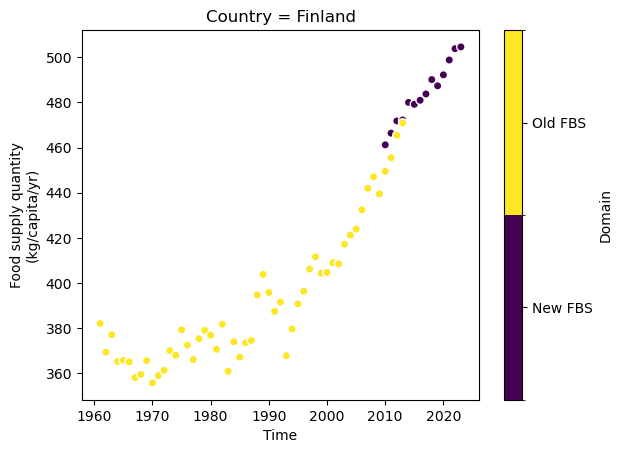

In [145]:
tmp.plot.scatter(x = 'Time', y = 'Food supply quantity (kg/capita/yr)', hue = 'Domain', marker='o')
#tmp.plot.line(x = 'Time', y = 'Food supply quantity (kg/capita/yr)', hue = 'Domain', marker='o')

Text(0.5, 1.0, 'Finland')

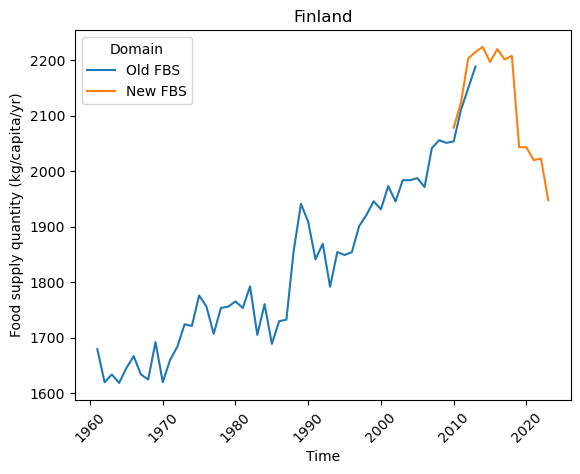

In [149]:
mycountry = 'Finland'

Element = 'elementDict' # 645
mypars = {'element': [elementDict.get('Protein supply quantity (g/capita/day)')],'area': '67'}

Element = 'Food supply quantity (kg/capita/yr)' # 645
mypars = {'element': [elementDict.get('Food supply quantity (kg/capita/yr)')],'area': areaDict.get('Finland')}

#mypars = {'element': ['645'],'countries': 'Countries'}
#mypars = {'element': ['645']}
mycoding = {'area': 'ISO3'}
mycoding = {'area': 'FAO'}
#mycoding = {'area': 'countries'}


newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
newdata2['Domain'] = 'New FBS'

olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
olddata2['Domain'] = 'Old FBS'

data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
data.rename(columns = {'Value': Element}, inplace = True)
data['Country'] = mycountry
data['Time'] = pd.to_datetime(data.Year, format='%Y')
ax = sns.lineplot(data, y = Element, x = 'Time', hue = 'Domain')
ax.tick_params(axis='x', rotation=45)
ax.set_title(mycountry)

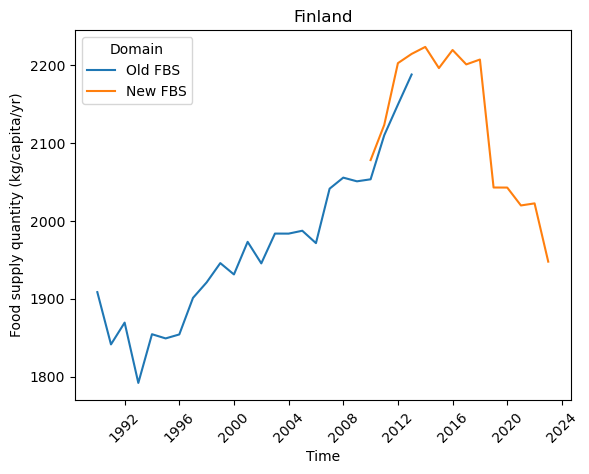

In [193]:


def plotting(mycountry, myElement, startingYear):

    #startingYear
    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry)}

    mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}

    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
    newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
    newdata2['Domain'] = 'New FBS'

    olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
    olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
    olddata2['Domain'] = 'Old FBS'

    data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
    data.rename(columns = {'Value': myElement}, inplace = True)
    data['Country'] = mycountry
    data['Time'] = pd.to_datetime(data.Year, format='%Y')
    if startingYear:
        data2 = data[data['Year'].astype(int) >= startingYear]
    else:
        data2 = data
    ax = sns.lineplot(data2, y = myElement, x = 'Time', hue = 'Domain')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(mycountry)
    
    
mycountry = 'Finland'
myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
plotting(mycountry, myElement, 1990)

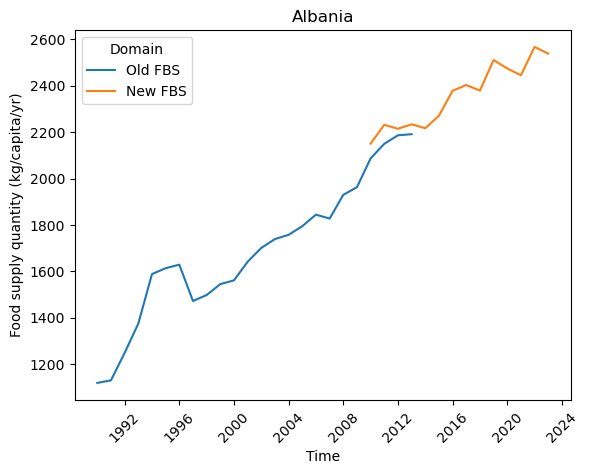

In [198]:
mycountry = 'Albania'
myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
plotting(mycountry, myElement, 1990)

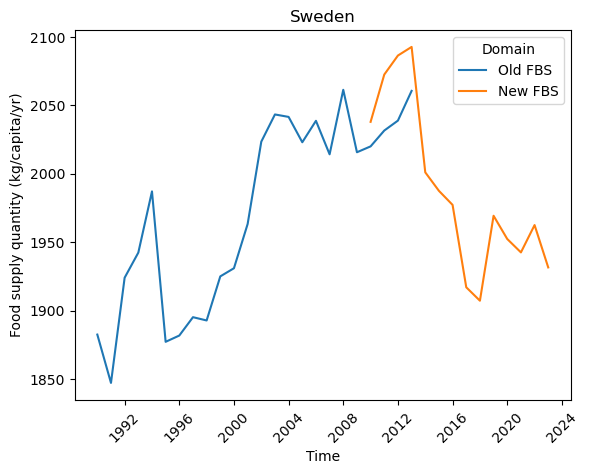

In [199]:
plotting('Sweden', myElement, 1990)

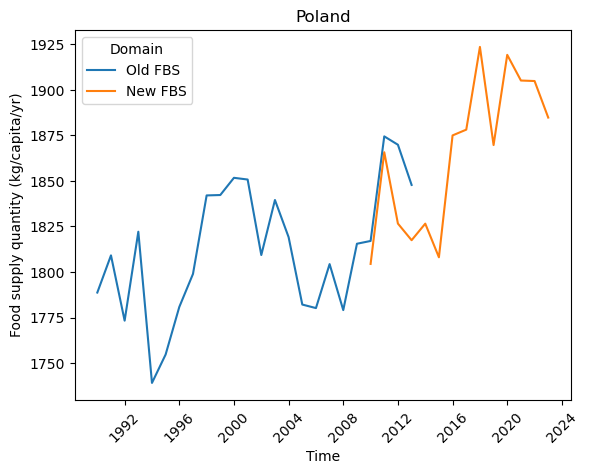

In [200]:
plotting('Poland', myElement, 1990)

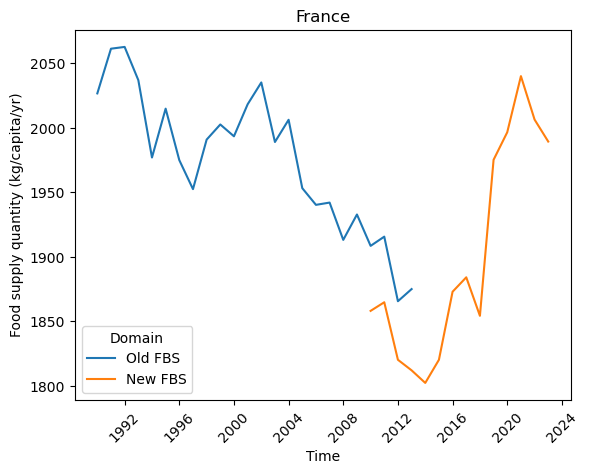

In [201]:
plotting('France', myElement, 1990)

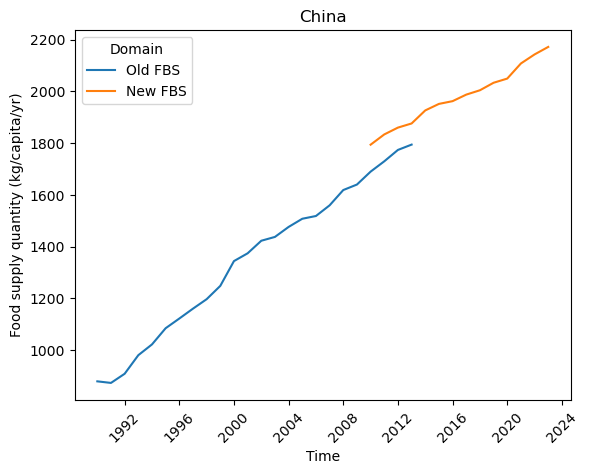

In [202]:
plotting('China', myElement, 1990)

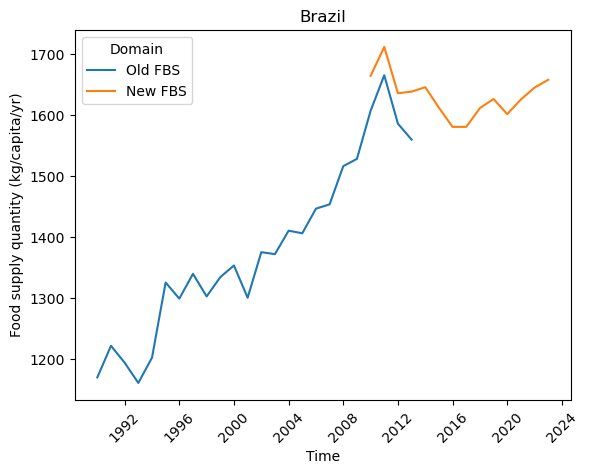

In [203]:
plotting('Brazil', myElement, 1990)

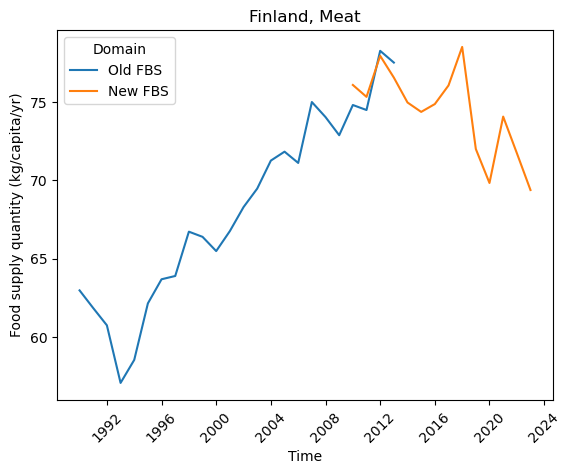

In [195]:
'Meat + (Total)'# '2943'
    
    


def plotting2(mycountry, myElement, startingYear):

    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': '2943'}

    mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}

    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
    Item = newdata['Item'][0]
    newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
    newdata2['Domain'] = 'New FBS'

    olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
    #print(olddata)
    olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
    olddata2['Domain'] = 'Old FBS'

    data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
    data.rename(columns = {'Value': myElement}, inplace = True)
    data['Country'] = mycountry
    data['Time'] = pd.to_datetime(data.Year, format='%Y')
    
    if startingYear:
        data2 = data[data['Year'].astype(int) >= startingYear]
    else:
        data2 = data

    ax = sns.lineplot(data2, y = myElement, x = 'Time', hue = 'Domain')
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {Item}')
    
    
mycountry = 'Finland'
#myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
plotting2(mycountry, myElement, 1990)

In [177]:
#countries

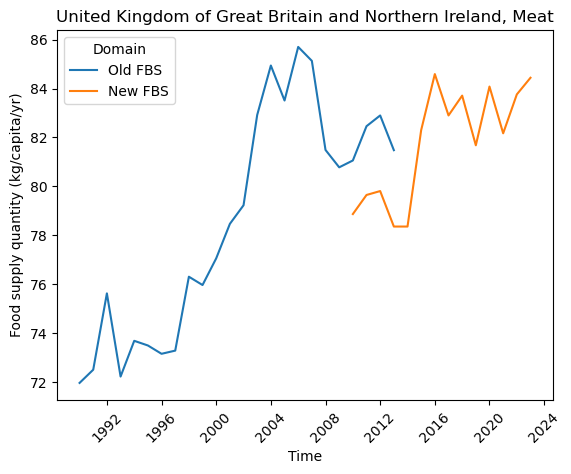

In [206]:
mycountry = 'United Kingdom of Great Britain and Northern Ireland'
#myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
plotting2(mycountry, myElement, 1990)

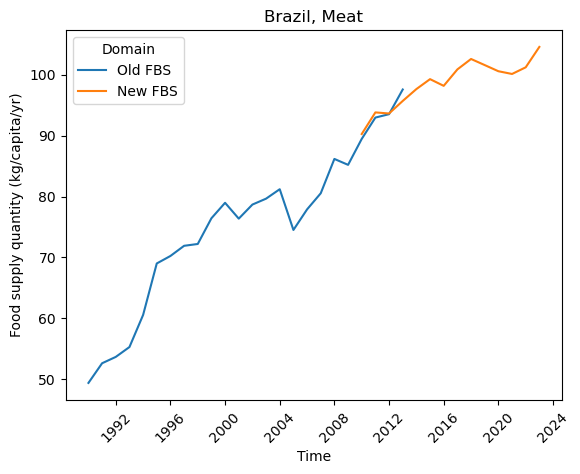

In [196]:
mycountry = 'Brazil'
#myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
plotting2(mycountry, myElement, 1990)

## Bias correction

In [225]:
newdata

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2010,2010,kg/cap,131.83
1,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2011,2011,kg/cap,129.72
2,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2012,2012,kg/cap,135.93
3,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2013,2013,kg/cap,134.31
4,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2905,Cereals - Excluding Beer,2014,2014,kg/cap,129.45
...,...,...,...,...,...,...,...,...,...,...,...,...
1381,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2019,2019,kg/cap,15.27
1382,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2020,2020,kg/cap,14.20
1383,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2021,2021,kg/cap,13.64
1384,FBS,Food Balances (2010-),67,Finland,645,Food supply quantity (kg/capita/yr),2899,Miscellaneous,2022,2022,kg/cap,14.74


In [242]:
correctionSubset = data[data.Year.duplicated(keep = False)]
correctionSubset

,Year,Food supply quantity (kg/capita/yr),Domain,Country,Time
49,2010,2053.47,Old FBS,Finland,2010-01-01
50,2011,2110.13,Old FBS,Finland,2011-01-01
51,2012,2149.44,Old FBS,Finland,2012-01-01
52,2013,2188.13,Old FBS,Finland,2013-01-01
53,2010,2078.15,New FBS,Finland,2010-01-01
54,2011,2123.45,New FBS,Finland,2011-01-01
55,2012,2202.74,New FBS,Finland,2012-01-01
56,2013,2214.59,New FBS,Finland,2013-01-01


In [253]:
# erotus:
MeanDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().mean()
MeanDiffBias

Food supply quantity (kg/capita/yr)    29.44
dtype: float64

In [277]:
dataMeanDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
dataMeanDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
# Exclude 2010-2013:
dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
dataMeanDiffBias['Country'] = mycountry
dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'
data3 = pd.concat([data, dataMeanDiffBias])

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_7148/4124868497.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataMeanDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]


In [287]:
MedianDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().median()
MedianDiffBias

Food supply quantity (kg/capita/yr)    25.57
dtype: float64

In [290]:
# erotus:
MedianDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().median()

dataMedianDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
dataMedianDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MedianDiffBias[0]
# Exclude 2010-2013:
dataMedianDiffBias = dataMedianDiffBias[~dataMedianDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
dataMedianDiffBias['Country'] = mycountry
dataMedianDiffBias['Domain'] = 'MedianDiffBiasCorrected'
data3 = pd.concat([data, dataMeanDiffBias, dataMedianDiffBias])

/var/folders/rb/c5sdfnq11t3f_0r8y_2_n_dr0000gn/T/ipykernel_7148/3339515654.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataMedianDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MedianDiffBias[0]


Text(0.5, 1.0, 'Finland')

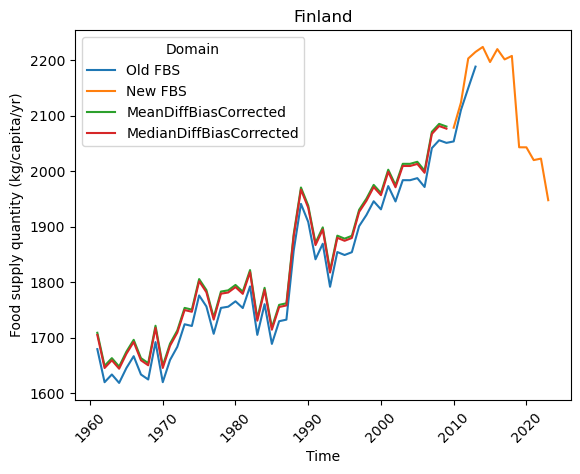

In [291]:
ax = sns.lineplot(data3, y = myElement, x = 'Time', hue = 'Domain')
ax.tick_params(axis='x', rotation=45)
ax.set_title(mycountry)

In [66]:
def plotting3(mycountry, myElement, startingYear, axes):

    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry)}

    mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}

    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
    newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
    newdata2['Domain'] = 'New FBS'

    olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
    olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
    olddata2['Domain'] = 'Old FBS'

    data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
    data.rename(columns = {'Value': myElement}, inplace = True)
    data['Country'] = mycountry
    data['Time'] = pd.to_datetime(data.Year, format='%Y')
    
    # Correction:
    correctionSubset = data[data.Year.duplicated(keep = False)]
    MeanDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().mean()
    print(f'Correction bias: {round(MeanDiffBias[0], 1)}')

    dataMeanDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
    dataMeanDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
    # Exclude 2010-2013:
    dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
    dataMeanDiffBias['Country'] = mycountry
    dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'

    
    data2 = pd.concat([data, dataMeanDiffBias])



    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2



    ax = sns.lineplot(data3, y = myElement, x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(mycountry)
    ax.text(7024, data3[myElement].max(), f'Correction: {round(MeanDiffBias[0], 1)}')
    
    
mycountry = 'Finland'
myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
startingYear = None
#plotting3(mycountry, myElement, 1990, ax)


In [65]:
'Meat + (Total)'# '2943'
    
    


def plotting4(mycountry, myElement, startingYear, axes):

    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': '2943'}

    mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}

    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
    Item = newdata['Item'][0]
    newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
    newdata2['Domain'] = 'New FBS'

    olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
    #print(olddata)
    olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
    olddata2['Domain'] = 'Old FBS'

    data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
    data.rename(columns = {'Value': myElement}, inplace = True)
    data['Country'] = mycountry
    data['Time'] = pd.to_datetime(data.Year, format='%Y')
    
    # Correction:
    correctionSubset = data[data.Year.duplicated(keep = False)]    
    MeanDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().mean()
    print(f'Correction bias: {round(MeanDiffBias[0], 1)}')
    dataMeanDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
    dataMeanDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
    # Exclude 2010-2013:
    dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
    dataMeanDiffBias['Country'] = mycountry
    dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'


    data2 = pd.concat([data, dataMeanDiffBias])
    
    
    
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    ax = sns.lineplot(data3, y = myElement, x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {Item}')
    
    ax.text(7024, data3[myElement].max(), f'Correction: {round(MeanDiffBias[0], 1)}')
    
mycountry = 'Finland'
#myElement = 'Protein supply quantity (g/capita/day)'
myElement = 'Food supply quantity (kg/capita/yr)'
#plotting4(mycountry, myElement, 1990, ax)

Correction bias: 58.1
Correction bias: -0.0


<function matplotlib.pyplot.show(close=None, block=None)>

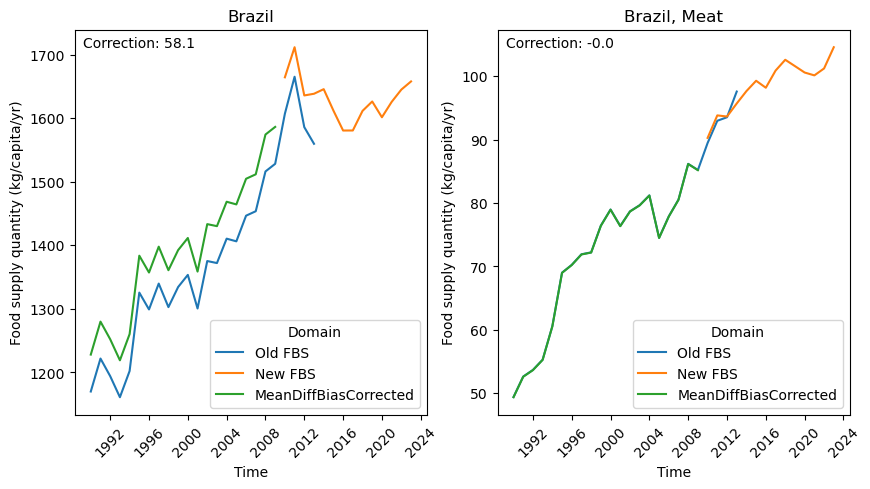

In [67]:
#for mycountry in ['Brazil', 'China', 'Sweden', 'United Kingdom of Great Britain and Northern Ireland', 'World + (Total)', 'Africa + (Total)', '-- Northern America + (Total)', '-- Northern Europe + (Total)']:
warnings.filterwarnings('ignore')
mycountry = 'Brazil'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

Correction bias: 170.2
Correction bias: -2.8


<function matplotlib.pyplot.show(close=None, block=None)>

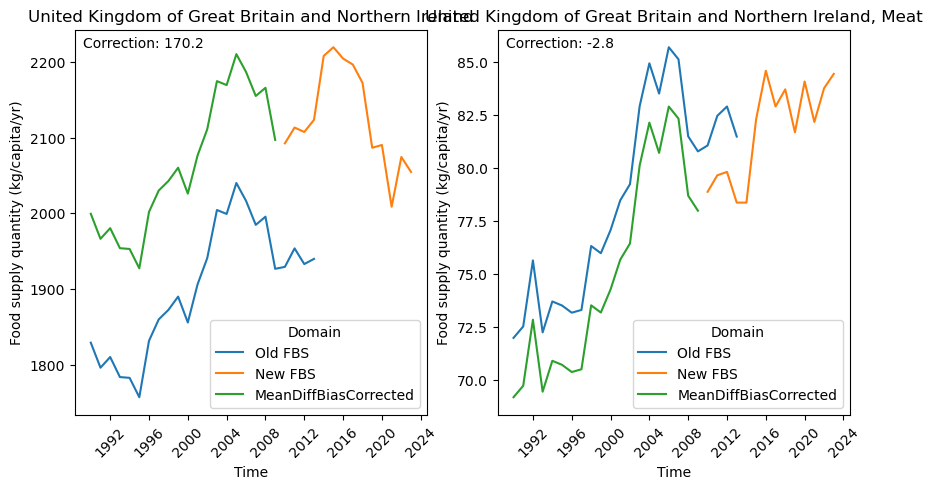

In [68]:

warnings.filterwarnings('ignore')
mycountry = 'United Kingdom of Great Britain and Northern Ireland'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

Correction bias: 94.0
Correction bias: -0.6


<function matplotlib.pyplot.show(close=None, block=None)>

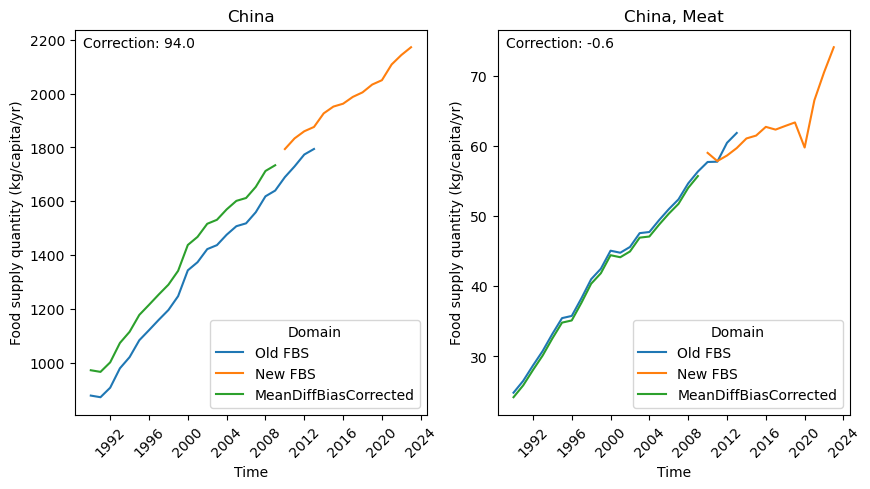

In [69]:
warnings.filterwarnings('ignore')
mycountry = 'China'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

Correction bias: 34.6
Correction bias: -0.2


<function matplotlib.pyplot.show(close=None, block=None)>

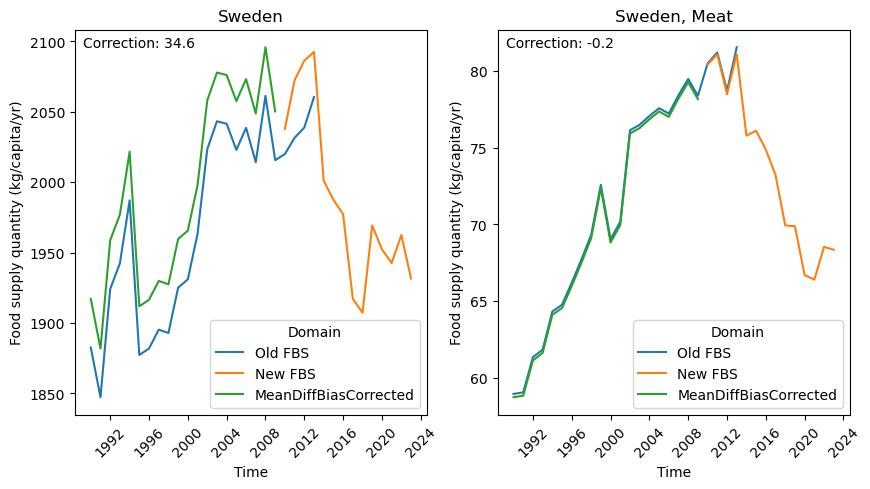

In [70]:
warnings.filterwarnings('ignore')
mycountry = 'Sweden'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

Correction bias: 34.1
Correction bias: -1.3


<function matplotlib.pyplot.show(close=None, block=None)>

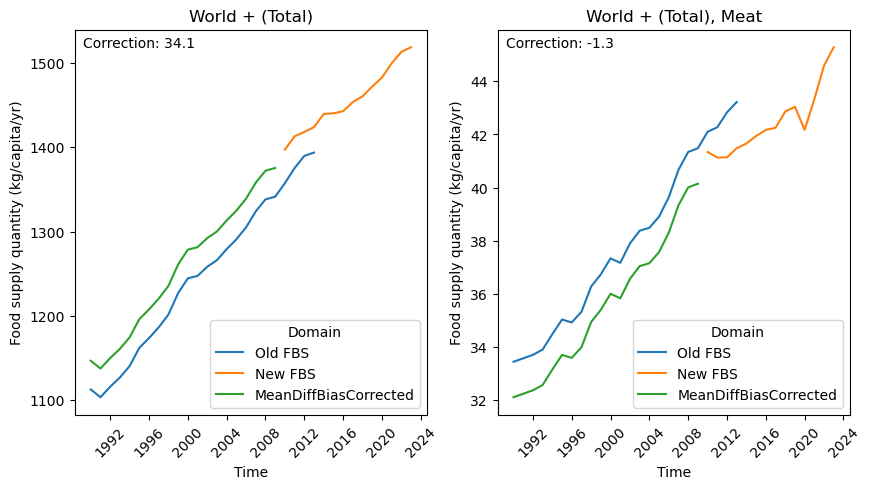

In [71]:
warnings.filterwarnings('ignore')
mycountry = 'World + (Total)'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

Correction bias: 20.3
Correction bias: 0.1


<function matplotlib.pyplot.show(close=None, block=None)>

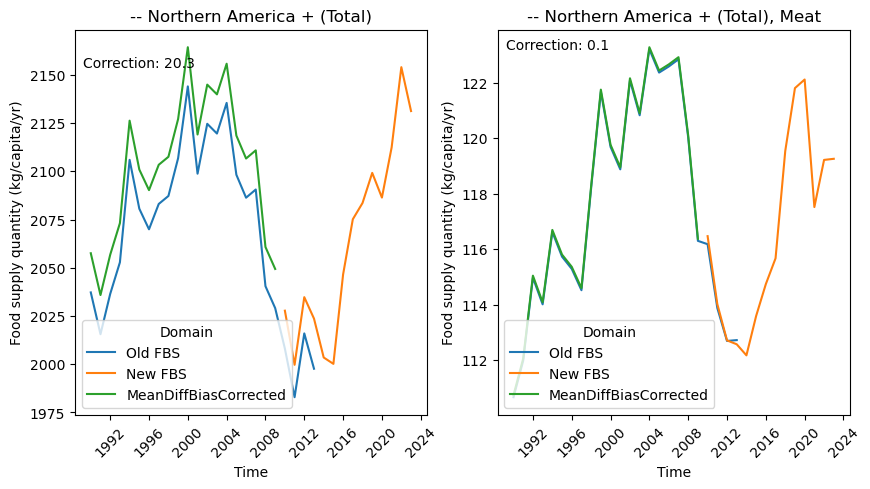

In [45]:
warnings.filterwarnings('ignore')
mycountry = '-- Northern America + (Total)'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

In [72]:
warnings.filterwarnings('ignore')

# Missä suurimmat korjauskertoimet?

myElement = 'Food supply quantity (kg/capita/yr)'

elementDict = faostat.get_par('FBSH', 'element')

areaDict = faostat.get_par('FBS', 'area')
countries = list(areaDict.keys())[:179]
regions = list(areaDict.keys())[179:]

#def checkData(mycountry, myElement, myItem):

correctionBias = []


myItemsDict = faostat.get_par('FBS', 'item')
myItemsKeys = list(myItemsDict.keys())

indices = [0, 2, 14, 16, 22, 24]
selectedRegions = list(map(lambda x: regions[x],indices))

for mycountry in selectedRegions:
    for myItem in myItemsKeys:
        #print(myItem)
        #print(mycountry)
        #print(elementDict.get(myElement))
        #print(myItemsDict.get(myItem))
        
        mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': myItemsDict.get(myItem)}

        #mycoding = {'area': 'ISO3'}
        mycoding = {'area': 'FAO'}
        #print(mypars)
        newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
        if newdata.empty:
            print(f'No FBS data found for {myItem} in {mycountry}.')
            continue
        
        else:

            newdata['Domain'] = 'New FBS'

            olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
            if olddata.empty:
                print(f'No FBSH data found for {myItem} in {mycountry}.')
                continue
            else:
                olddata['Domain'] = 'Old FBS'

                data = pd.concat([olddata, newdata], axis = 0).reset_index()
                data.rename(columns = {'Value': myItem}, inplace = True)
                data['Country'] = mycountry
                data['Time'] = pd.to_datetime(data.Year, format='%Y')

                # Correction:
                correctionSubset = data[data.Year.duplicated(keep = False)]    
                MeanDiffBias = correctionSubset[['Year', myItem]].groupby('Year').diff().mean()
                MeanDiffBiasPros = round(100*MeanDiffBias[0]/correctionSubset[myItem].mean(),1)
                #print(f'Correction bias: {round(MeanDiffBias[0], 1)}')
                #print(f'{round(100*MeanDiffBias[0]/correctionSubset[myItem].mean(),1)}%')
                dataMeanDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
                dataMeanDiffBias[myItem] = data[myItem][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
                # Exclude 2010-2013:
                dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012'])]
                dataMeanDiffBias['Country'] = mycountry
                dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'


                correctionBias.append([mycountry, myElement, myItem, round(MeanDiffBias[0], 1), MeanDiffBiasPros])

                
df = pd.DataFrame(correctionBias)
df.columns = ['Region', 'Element', 'Item', 'Correction', 'Correction-%']
df

No FBS data found for Population in World + (Total).
No FBSH data found for Rice and products in World + (Total).
No FBSH data found for Groundnuts in World + (Total).
No FBSH data found for Alcohol, Non-Food in World + (Total).
No FBSH data found for Miscellaneous in World + (Total).
No FBS data found for Grand Total + (Total) in World + (Total).
No FBS data found for Vegetal Products + (Total) in World + (Total).
No FBS data found for Animal Products + (Total) in World + (Total).
No FBS data found for Population in Africa + (Total).
No FBSH data found for Rice and products in Africa + (Total).
No FBSH data found for Groundnuts in Africa + (Total).
No FBSH data found for Cottonseed in Africa + (Total).
No FBSH data found for Ricebran Oil in Africa + (Total).
No FBSH data found for Alcohol, Non-Food in Africa + (Total).
No FBS data found for Meat, Aquatic Mammals in Africa + (Total).
No FBSH data found for Miscellaneous in Africa + (Total).
No FBS data found for Grand Total + (Total) i

,Region,Element,Item,Correction,Correction-%
0,World + (Total),Food supply quantity (kg/capita/yr),Wheat and products,1.4,2.2
1,World + (Total),Food supply quantity (kg/capita/yr),Barley and products,-0.0,-0.5
2,World + (Total),Food supply quantity (kg/capita/yr),Maize and products,-0.3,-1.9
3,World + (Total),Food supply quantity (kg/capita/yr),Rye and products,-0.1,-9.3
4,World + (Total),Food supply quantity (kg/capita/yr),Oats,0.0,0.0
...,...,...,...,...,...
809,Asia + (Total),Food supply quantity (kg/capita/yr),"Fish, Seafood > (List)",-0.6,-33.4
810,Asia + (Total),Food supply quantity (kg/capita/yr),"Aquatic Products, Other + (Total)",0.2,7.3
811,Asia + (Total),Food supply quantity (kg/capita/yr),"Aquatic Products, Other > (List)",0.2,7.3
812,Asia + (Total),Food supply quantity (kg/capita/yr),Miscellaneous + (Total),0.4,149.8


In [74]:
df.sort_values('Correction-%')[:20]

,Region,Element,Item,Correction,Correction-%
444,-- Northern America + (Total),Food supply quantity (kg/capita/yr),Palm Oil,-0.1,-200.0
167,Africa + (Total),Food supply quantity (kg/capita/yr),Palm kernels,-0.0,-200.0
600,-- South America + (Total),Food supply quantity (kg/capita/yr),Pimento,-0.3,-186.8
562,-- South America + (Total),Food supply quantity (kg/capita/yr),Soyabeans,-1.9,-182.0
777,Asia + (Total),Food supply quantity (kg/capita/yr),Sugar Crops > (List),-4.6,-179.5
102,World + (Total),Food supply quantity (kg/capita/yr),Sugar Crops > (List),-3.5,-176.7
238,Africa + (Total),Food supply quantity (kg/capita/yr),Sugar Crops > (List),-4.8,-174.9
375,Americas + (Total),Food supply quantity (kg/capita/yr),Sugar Crops > (List),-1.6,-164.2
639,-- South America + (Total),Food supply quantity (kg/capita/yr),Sugar Crops > (List),-3.4,-162.8
298,Americas + (Total),Food supply quantity (kg/capita/yr),Soyabeans,-0.9,-155.2


In [75]:
indices = [0, 2, 14, 16, 22, 24]
list(map(lambda x: regions[x],indices))

['World + (Total)',
 'Africa + (Total)',
 'Americas + (Total)',
 '-- Northern America + (Total)',
 '-- South America + (Total)',
 'Asia + (Total)']

Correction bias: 20.3
Correction bias: 0.1


<function matplotlib.pyplot.show(close=None, block=None)>

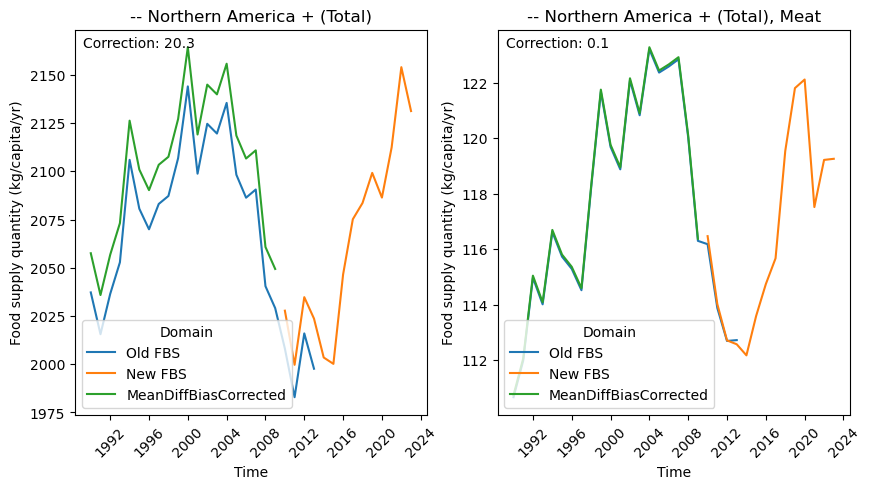

In [76]:
warnings.filterwarnings('ignore')
mycountry = '-- Northern America + (Total)'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plotting3(mycountry, myElement, 1990, ax1)
plotting4(mycountry, myElement, 1990, ax2)
plt.show

In [133]:
warnings.filterwarnings('ignore')

myItemsDict = faostat.get_par('FBS', 'item')
myItemsKeys = list(myItemsDict.keys())

def plotting5(mycountry, myElement, myItem, startingYear, axes):
    areaDict = faostat.get_par('FBS', 'area')
    elementDict = faostat.get_par('FBS', 'element')
    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': myItemsDict.get(myItem)}

    mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}

    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
    Item = newdata['Item'][0]
    newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
    newdata2['Domain'] = 'New FBS'

    olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
    #print(olddata)
    olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
    olddata2['Domain'] = 'Old FBS'

    data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
    data.rename(columns = {'Value': myElement}, inplace = True)
    data['Country'] = mycountry
    data['Time'] = pd.to_datetime(data.Year, format='%Y')
    
    # Correction:
    correctionSubset = data[data.Year.duplicated(keep = False)]    
    MeanDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().mean()
    MeanDiffBiasPros = round(100*MeanDiffBias[0]/correctionSubset[myElement].mean(),1)
    
    print(f'Correction bias: {round(MeanDiffBias[0], 1)} ({MeanDiffBiasPros}%)')
    dataMeanDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
    dataMeanDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
    # Exclude 2010-2013:
    dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
    dataMeanDiffBias['Country'] = mycountry
    dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'


    data2 = pd.concat([data, dataMeanDiffBias])
    
    
    
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    ax = sns.lineplot(data3, y = myElement, x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {Item}')
    
    ax.text(pd.to_datetime('1990', format='%Y'), data3[myElement].max(), f'Correction: {round(MeanDiffBias[0], 1)} ({MeanDiffBiasPros}%)')
    
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = '-- Northern America + (Total)'
myItem = 'Palm Oil'

plotting5(mycountry, myElement, myItem, 1990, ax1)

mycountry = '-- South America + (Total)'
myItem = 'Pimento'

plotting5(mycountry, myElement, myItem, 1990, ax2)
plt.show

SSLError: HTTPSConnectionPool(host='faostatservices.fao.org', port=443): Max retries exceeded with url: /api/v1/en/codes/item/FBS (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))

NameError: name 'plotting5' is not defined

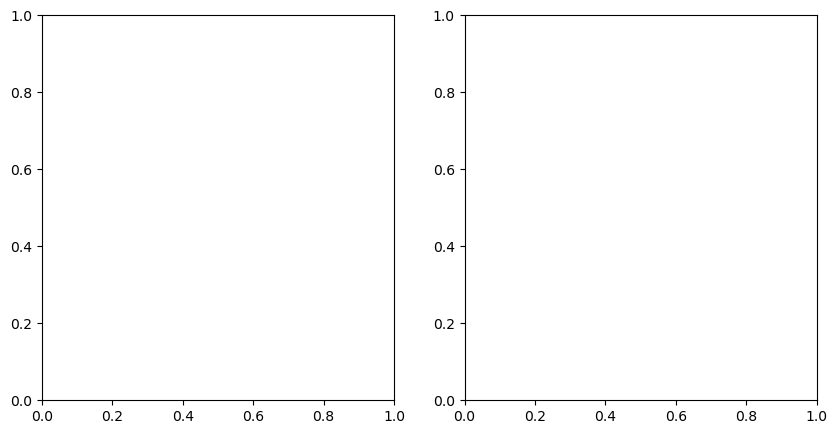

In [32]:
# jos mennään nollan alle... -> set = 0.0001
warnings.filterwarnings('ignore')

myItemsDict = faostat.get_par('FBS', 'item')
myItemsKeys = list(myItemsDict.keys())

def plotting6(mycountry, myElement, myItem, startingYear, axes):

    areaDict = faostat.get_par('FBS', 'area')
    elementDict = faostat.get_par('FBS', 'element')
    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': myItemsDict.get(myItem)}

    mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}

    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)
    Item = newdata['Item'][0]
    newdata2 = newdata[['Year', 'Value']].groupby(['Year']).sum()
    newdata2['Domain'] = 'New FBS'

    olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
    #print(olddata)
    olddata2 = olddata[['Year', 'Value']].groupby(['Year']).sum()
    olddata2['Domain'] = 'Old FBS'

    data = pd.concat([olddata2, newdata2], axis = 0).reset_index()
    data.rename(columns = {'Value': myElement}, inplace = True)
    data['Country'] = mycountry
    data['Time'] = pd.to_datetime(data.Year, format='%Y')

    # Correction:
    correctionSubset = data[data.Year.duplicated(keep = False)]    
    MeanDiffBias = correctionSubset[['Year', myElement]].groupby('Year').diff().mean()
    MeanDiffBiasPros = round(100*MeanDiffBias[0]/correctionSubset[myElement].mean(),1)

    print(f'Correction bias: {round(MeanDiffBias[0], 1)} ({MeanDiffBiasPros}%)')
    dataMeanDiffBias = data[data['Domain'] == 'Old FBS'][['Year', 'Time']]
    dataMeanDiffBias[myElement] = data[myElement][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
    # Exclude 2010-2013:
    dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
    dataMeanDiffBias['Country'] = mycountry

    AdjustedFinal0 = data[data['Domain'] == 'New FBS'][['Year', 'Time']]
    AdjustedFinal0[myElement] = data[myElement][data['Domain'] == 'New FBS']
    AdjustedFinal0['Country'] = mycountry
    AdjustedFinal = pd.concat([AdjustedFinal0, dataMeanDiffBias])
    # Replace below zero values with 0.001
    AdjustedFinal[myElement] = AdjustedFinal[myElement].mask(AdjustedFinal[myElement] < 0, 0.001)
    
    AdjustedFinal['Domain'] = 'BiasCorrectedAdjusted'
    dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'

    data2 = pd.concat([data, dataMeanDiffBias, AdjustedFinal])
    
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    ax = sns.lineplot(data3, y = myElement, x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {Item}')
    
    ax.text(pd.to_datetime('1990', format='%Y'), data3[myElement].max(), f'Correction: {round(MeanDiffBias[0], 1)} ({MeanDiffBiasPros}%)')
    
    
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = '-- South America + (Total)'
myItem = 'Pimento'

plotting5(mycountry, myElement, myItem, 1990, ax1)

mycountry = '-- South America + (Total)'
myItem = 'Pimento'

plotting6(mycountry, myElement, myItem, 1990, ax2)
plt.show

In [105]:
myElement

'Food supply quantity (kg/capita/yr)'

In [108]:

AdjustedFinal[myElement].mask(AdjustedFinal[myElement] < 0, 0.001)

53    0.0100
54    0.0100
55    0.0100
56    0.0100
57    0.0100
       ...  
44    0.0175
45    0.0275
46    0.0175
47    0.0010
48    0.0075
Name: Food supply quantity (kg/capita/yr), Length: 63, dtype: float64

In [372]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [302]:
regions[0, 2, 14, 16, 22, 24]

['World + (Total)',
 'World > (List)',
 'Africa + (Total)',
 'Africa > (List)',
 '-- Eastern Africa + (Total)',
 '-- Eastern Africa > (List)',
 '-- Middle Africa + (Total)',
 '-- Middle Africa > (List)',
 '-- Northern Africa + (Total)',
 '-- Northern Africa > (List)',
 '-- Southern Africa + (Total)',
 '-- Southern Africa > (List)',
 '-- Western Africa + (Total)',
 '-- Western Africa > (List)',
 'Americas + (Total)',
 'Americas > (List)',
 '-- Northern America + (Total)',
 '-- Northern America > (List)',
 '-- Central America + (Total)',
 '-- Central America > (List)',
 '-- Caribbean + (Total)',
 '-- Caribbean > (List)',
 '-- South America + (Total)',
 '-- South America > (List)',
 'Asia + (Total)',
 'Asia > (List)',
 '-- Central Asia + (Total)',
 '-- Central Asia > (List)',
 '-- Eastern Asia + (Total)',
 '-- Eastern Asia > (List)',
 '-- Southern Asia + (Total)',
 '-- Southern Asia > (List)',
 '-- South-eastern Asia + (Total)',
 '-- South-eastern Asia > (List)',
 '-- Western Asia + (Tota

In [77]:
myItemsDict.get(myItem)
#myItem

'2903>'

In [127]:
# take all elements, areas and items in Food Balance Sheets:
# List/dictionary of elements
elementDict = faostat.get_par('FBS', 'element')
elements = list(elementDict.keys())

# List/dictionary of countries/regions:
areaDict = faostat.get_par('FBS', 'area')
areas = list(areaDict.keys())

# List/dictionary of items
myItemsDict = faostat.get_par('FBS', 'item')
myItemsKeys = list(myItemsDict.keys())

# List/dictionary of aggregated items:
myItemsAggDict = faostat.get_par('FBS', 'itemsagg')
myItemsAggKeys = list(myItemsDict.keys())


In [121]:
elementDict

{'Total Population - Both sexes': '511',
 'Production Quantity': '2510',
 'Import Quantity': '2610',
 'Stock Variation': '2071',
 'Export Quantity': '2910',
 'Domestic supply quantity': '2300',
 'Feed': '2520',
 'Seed': '2525',
 'Losses': '2120',
 'Processed': '2130',
 'Other uses (non-food)': '2151',
 'Tourist consumption': '5171',
 'Residuals': '5170',
 'Food': '2141',
 'Food supply quantity (kg/capita/yr)': '645',
 'Food supply (kcal/capita/day)': '664',
 'Protein supply quantity (g/capita/day)': '674',
 'Fat supply quantity (g/capita/day)': '684'}

In [118]:
i = 0
j = 0
# Initiate a list for results:
results = []
# Loop all countries/regions:
#for mycountry in areas:

mycountry = 'Finland'
# Loop all items:
for myItem in myItemsKeys:

    print(myItem)
    #print(myItemsDict.get(myItem))
    print(mycountry)

    #print(elementDict.get(myElement))
    #print(myItemsDict.get(myItem))

    # Prepare database call, parameteres:
    mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': myItemsDict.get(myItem)}

    #mycoding = {'area': 'ISO3'}
    mycoding = {'area': 'FAO'}
    #print(mypars)
    # Fetch data from the new FBS:
    newdata = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)

    if newdata.empty:
        print(f'No FBS data found for {myItem} in {mycountry}.')
        continue

    else:

        newdata['Domain'] = 'New FBS'

        # Fetch data from the historical (old) FBS:
        olddata = faostat.get_data_df('FBSH', pars=mypars, coding=mycoding, strval=False)
        if olddata.empty:
            #print(f'No FBSH data found for {myItem} in {mycountry}.')
            continue
        else:
            olddata['Domain'] = 'Old FBS'

            # Merge old and new data:
            data = pd.concat([olddata, newdata], axis = 0).reset_index()
            data.rename(columns = {'Value': myItem}, inplace = True)
            #data['Country'] = mycountry
            #data['Time'] = pd.to_datetime(data.Year, format='%Y')
            #print(data)
            # Correction:
            # Take duplicated years into a subset (should be 2010-2013):
            correctionSubset = data[data.Year.duplicated(keep = False)]    
            # Take the difference of each year and their mean:
            MeanDiffBias = correctionSubset[['Year', myItem]].groupby('Year').diff().mean()
            # What is the scale of correction related to the original values (their mean):
            MeanDiffBiasPerc = round(100*MeanDiffBias[0]/correctionSubset[myItem].mean(),1)
            #print(f'Correction bias: {round(MeanDiffBias[0], 1)}')
            #print(f'{round(100*MeanDiffBias[0]/correctionSubset[myItem].mean(),1)}%')

            # Subset the Old data and add the bias correction:
            dataMeanDiffBias = data[data['Domain'] == 'Old FBS'].drop(columns = [myItem, 'Domain'])
            dataMeanDiffBias[myItem] = data[myItem][data['Domain'] == 'Old FBS'] + MeanDiffBias[0]
            # Exclude 2010-2013 (these years will have the new data to use):
            dataMeanDiffBias = dataMeanDiffBias[~dataMeanDiffBias['Year'].isin(['2010', '2011', '2012', '2013'])]
            #dataMeanDiffBias['Country'] = mycountry
            #dataMeanDiffBias['Domain'] = 'MeanDiffBiasCorrected'
            #print(dataMeanDiffBias)

            # Combine new data (2010-) with the bias corrected old data (up to 2009):
            AdjustedFinal0 = data[data['Domain'] == 'New FBS'].drop(columns = ['Domain'])
            #AdjustedFinal0[myElement] = data['Element'][data['Domain'] == 'New FBS']
            #AdjustedFinal0['Country'] = mycountry
            AdjustedFinal = pd.concat([AdjustedFinal0, dataMeanDiffBias])
            # Replace below zero values with 0.001
            #print(AdjustedFinal.head())
            AdjustedFinal[myItem] = AdjustedFinal[myItem].mask(AdjustedFinal[myItem] < 0, 0.001)

            AdjustedFinal['Domain'] = 'BiasCorrectedAdjusted'
            #print(AdjustedFinal)
            AdjustedFinal['MeanDiffBias'] = round(MeanDiffBias[0], 1)
            AdjustedFinal['MeanDiffBiasPerc'] = MeanDiffBiasPerc
            data['MeanDiffBias'] = None
            data['MeanDiffBiasPerc'] = None               

            data2 = pd.concat([data, AdjustedFinal])
            #print(data2)


            results.append(data2)





    break
#df = pd.DataFrame(results)
df = pd.concat(results, axis = 0, ignore_index = True)
#df.columns = ['Region', 'Element', 'Item', 'Correction', 'Correction-%']
print(df.shape)


Population
Finland
(130, 15)


In [117]:
df

,index,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Population,MeanDiffBias,MeanDiffBiasPerc
0,0,FBSH,Old FBS,2,Afghanistan,511,Total Population - Both sexes,2501,Population,1961,1961,1000 No,8954.0000,NaN,NaN
1,1,FBSH,Old FBS,2,Afghanistan,511,Total Population - Both sexes,2501,Population,1962,1962,1000 No,9142.0000,NaN,NaN
2,2,FBSH,Old FBS,2,Afghanistan,511,Total Population - Both sexes,2501,Population,1963,1963,1000 No,9340.0000,NaN,NaN
3,3,FBSH,Old FBS,2,Afghanistan,511,Total Population - Both sexes,2501,Population,1964,1964,1000 No,9547.0000,NaN,NaN
4,4,FBSH,Old FBS,2,Afghanistan,511,Total Population - Both sexes,2501,Population,1965,1965,1000 No,9765.0000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,44,FBSH,BiasCorrectedAdjusted,2,Afghanistan,511,Total Population - Both sexes,2501,Population,2005,2005,1000 No,25344.6325,483.6,1.6
126,45,FBSH,BiasCorrectedAdjusted,2,Afghanistan,511,Total Population - Both sexes,2501,Population,2006,2006,1000 No,26114.6325,483.6,1.6
127,46,FBSH,BiasCorrectedAdjusted,2,Afghanistan,511,Total Population - Both sexes,2501,Population,2007,2007,1000 No,26832.6325,483.6,1.6
128,47,FBSH,BiasCorrectedAdjusted,2,Afghanistan,511,Total Population - Both sexes,2501,Population,2008,2008,1000 No,27515.6325,483.6,1.6


In [106]:
results

[[    index Domain Code                 Domain  Area Code (FAO)         Area  \
  0       0        FBSH                Old FBS                2  Afghanistan   
  1       1        FBSH                Old FBS                2  Afghanistan   
  2       2        FBSH                Old FBS                2  Afghanistan   
  3       3        FBSH                Old FBS                2  Afghanistan   
  4       4        FBSH                Old FBS                2  Afghanistan   
  ..    ...         ...                    ...              ...          ...   
  44     44        FBSH  BiasCorrectedAdjusted                2  Afghanistan   
  45     45        FBSH  BiasCorrectedAdjusted                2  Afghanistan   
  46     46        FBSH  BiasCorrectedAdjusted                2  Afghanistan   
  47     47        FBSH  BiasCorrectedAdjusted                2  Afghanistan   
  48     48        FBSH  BiasCorrectedAdjusted                2  Afghanistan   
  
      Element Code                   

In [101]:
mypars = {'element': [elementDict.get(myElement)],'area': areaDict.get(mycountry), 'item': myItemsDict.get(myItem)}
mypars

{'element': ['511'], 'area': '2', 'item': '2501'}

In [102]:
myElement

'Total Population - Both sexes'

In [99]:
myItemsDict.get(myItem)

'2501'

In [88]:
faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value


In [89]:
mypars

{'element': ['511'], 'area': '10', 'item': '2903>'}

In [58]:
def plotting7(data, mycountry, myElement, myItem, startingYear, axes):

    # Subset data:
    data22 = data[(data['Area'] == mycountry) & (data['Element'] == myElement) & (data['Item'] == myItem)]
    #exclude BiasCorrectedAdjusted:
    data2 = data22[~(data22['Domain'] == 'BiasCorrectedAdjusted')]
    
    data2['Time'] = pd.to_datetime(data2.Year, format='%Y')

    
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    ax = sns.lineplot(data3, y = myItem, x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    
    #ax.text(pd.to_datetime('1990', format='%Y'), data3[myItem].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
    

def plotting8(data, mycountry, myElement, myItem, startingYear, axes):

    # Subset data:
    data2 = data[(data['Area'] == mycountry) & (data['Element'] == myElement) & (data['Item'] == myItem)]
    data2['Time'] = pd.to_datetime(data2.Year, format='%Y')
    
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    ax = sns.lineplot(data3, y = myItem, x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    
    ax.text(pd.to_datetime('1990', format='%Y'), data3[myItem].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
      

In [52]:
f'{mycountry}, {myItem}'

'Afghanistan, Population'

<function matplotlib.pyplot.show(close=None, block=None)>

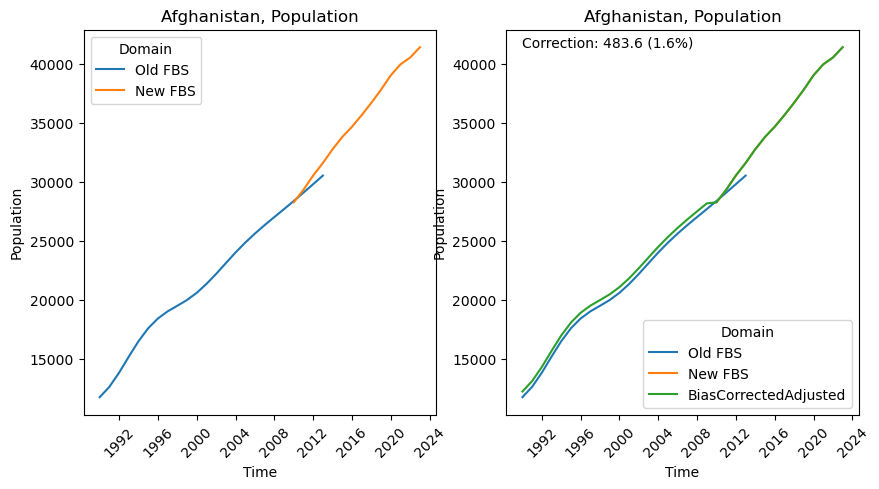

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'Afghanistan'
myItem = 'Population'
myElement = 'Total Population - Both sexes'

plotting7(df, mycountry, myElement, myItem, 1990, ax1)

plotting8(df, mycountry, myElement, myItem, 1990, ax2)
plt.show

ValueError: Could not interpret value `Grand Total + (Total)` for `y`. An entry with this name does not appear in `data`.

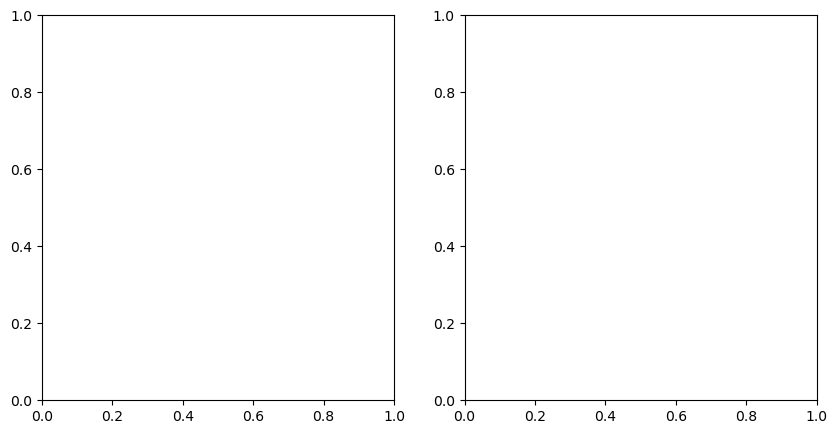

In [122]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))


mycountry = 'Afghanistan'
myItem = 'Grand Total + (Total)'
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItem, 1990, ax1)

plotting8(df, mycountry, myElement, myItem, 1990, ax2)
plt.show

In [ ]:
'Wheat and products'

In [131]:
mypars = {'element': [elementDict.get('Food supply quantity (kg/capita/yr)')],'area': areaDict.get('Finland'),
         'item': myItemsDict.get('Wheat and products')}

#mypars = {'element': elementDict.get('Food supply quantity (kg/capita/yr)'),'area': areaDict.get('Finland'),
#         'item': myItemsDict.get('Wheat and products')}

tmp = faostat.get_data_df('FBS', pars=mypars, coding=mycoding, strval=False)

tmp.shape

(14, 12)

In [132]:
elementDict.get('Food supply quantity (kg/capita/yr)')

'645'